#### <span style="color:red; font-weight:bold">This ipynb file is to serve as production/test for the different sections of the algorithm/function module for the project in a step by step process before pushing to the final version</span>


In [1]:
# To check the current python path
import sys
print(sys.executable)

c:\Users\muham\AppData\Local\Programs\Python\Python310\python.exe


## All the modules needed

In [ ]:
# Yahoo Finance API to pull the data
import yfinance as yf
# Pandas and Numpy for data maniupulation 
import pandas as pd
import numpy as np
# Matflotlib and Ploty for visualizations (Testing purposes)
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
# Check versions to avoid any compatibility issues
print("NumPy:", np.__version__)
print("Pandas:", pd.__version__)
print("yfinance:", yf.__version__)


NumPy: 1.26.4
Pandas: 2.2.1
yfinance: 0.2.65


## Pulling Data from Data.py (vizualization and understanding)

In [36]:
# If you just edited data.py in the same session, set DO_RELOAD=True to re-import fresh.
DO_RELOAD = False

import os, sys
from importlib import import_module, reload

# 1) Import the correct module name (usually lowercase "data")
try:
    data = import_module("Data")     # <-- change to "Data" only if your file is literally Data.py
except ModuleNotFoundError:
    # If your notebook is in a subfolder (e.g., notebooks/), add repo root to path and retry
    sys.path.append(os.path.abspath(".."))
    data = import_module("data")

if DO_RELOAD:
    data = reload(data)

print("Loaded data module from:", data.__file__)

# 2) Grab all DataFrames built by data.py
long_df    = data.long_df
open_df    = data.open_df
high_df    = data.high_df
low_df     = data.low_df
close_df   = data.close_df
volume_df  = data.volume_df
outlier_df = data.outlier_df

# 3) Quick peek
display(long_df.head(8))

# 4) Confirm Sector presence:
print("\n[long_df] columns:", list(long_df.columns))
if "Sector" in long_df.columns:
    print("Sectors found in long_df:", sorted(long_df["Sector"].unique()))

def _show_col_levels(df, name):
    colnames = getattr(df.columns, "names", None)
    print(f"\n{name}: shape={df.shape} | column level names={colnames}")
    try:
        display(df.columns.to_frame(index=False).head(10))  # shows (Sector, Ticker) pairs if MultiIndex
    except Exception:
        pass
    display(df.head())

for nm, df in [("open_df", open_df), ("high_df", high_df), ("low_df", low_df),
               ("close_df", close_df), ("volume_df", volume_df), ("outlier_df", outlier_df)]:
    _show_col_levels(df, nm)


Loaded data module from: c:\Users\muham\INF1002-Python\scripts\Data.py


Price,Date,Ticker,Sector,Open,High,Low,Close,Volume,Return_Outlier
0,2022-09-19,AAPL,Tech,149.309998,154.559998,149.100006,154.479996,81474200.0,False
1,2022-09-20,AAPL,Tech,153.399994,158.080002,153.080002,156.899994,107689800.0,False
2,2022-09-21,AAPL,Tech,157.339996,158.740005,153.600006,153.720001,101696800.0,False
3,2022-09-22,AAPL,Tech,152.380005,154.470001,150.910004,152.740005,86652500.0,False
4,2022-09-23,AAPL,Tech,151.190002,151.470001,148.559998,150.429993,96029900.0,False
5,2022-09-26,AAPL,Tech,149.660004,153.770004,149.639999,150.770004,93339400.0,False
6,2022-09-27,AAPL,Tech,152.740005,154.720001,149.949997,151.759995,84442700.0,False
7,2022-09-28,AAPL,Tech,147.639999,150.639999,144.839996,149.839996,146691400.0,False



[long_df] columns: ['Date', 'Ticker', 'Sector', 'Open', 'High', 'Low', 'Close', 'Volume', 'Return_Outlier']
Sectors found in long_df: ['Consumer Goods', 'Energy', 'Finance', 'Healthcare', 'Tech']

open_df: shape=(751, 15) | column level names=['Sector', 'Ticker']


,Sector,Ticker
0,Tech,AAPL
1,Tech,MSFT
2,Tech,NVDA
3,Finance,JPM
4,Finance,BAC
5,Finance,MA
6,Healthcare,JNJ
7,Healthcare,PFE
8,Healthcare,ABBV
9,Consumer Goods,PEP


Sector            Tech                         Finance                         \
Ticker            AAPL        MSFT    NVDA         JPM        BAC          MA   
Date                                                                            
2022-09-19  149.309998  242.470001  13.012  116.000000  33.720001  311.950012   
2022-09-20  153.399994  242.070007  13.215  117.410004  34.500000  311.160004   
2022-09-21  157.339996  244.270004  13.213  116.540001  34.310001  314.480011   
2022-09-22  152.380005  237.869995  13.070  113.379997  33.310001  302.950012   
2022-09-23  151.190002  239.539993  12.420  110.050003  31.930000  293.130005   

Sector      Healthcare                        Consumer Goods              \
Ticker             JNJ        PFE        ABBV            PEP         MCD   
Date                                                                       
2022-09-19  166.300003  45.680000  143.639999     167.059998  254.000000   
2022-09-20  165.220001  45.000000  141.820007     167.580002  256.100006   
2022-09-21  165.020004  44.810001  142.149994     169.880005  255.130005   
2022-09-22  163.149994  43.669998  140.210007     168.399994  250.389999   
2022-09-23  165.740005  44.439999  142.070007     168.389999  247.210007   

Sector                     Energy                         
Ticker             NKE        XOM       SHEL         CVX  
Date                                                      
2022-09-19  103.690002  91.010002  51.939999  152.929993  
2022-09-20  103.820000  92.730003  52.529999  156.039993  
2022-09-21  102.669998  93.570000  53.450001  158.309998  
2022-09-22   99.790001  92.199997  53.049999  157.600006  
2022-09-23   96.919998  87.500000  49.560001  149.750000


high_df: shape=(751, 15) | column level names=['Sector', 'Ticker']


,Sector,Ticker
0,Tech,AAPL
1,Tech,MSFT
2,Tech,NVDA
3,Finance,JPM
4,Finance,BAC
5,Finance,MA
6,Healthcare,JNJ
7,Healthcare,PFE
8,Healthcare,ABBV
9,Consumer Goods,PEP


Sector            Tech                         Finance                         \
Ticker            AAPL        MSFT    NVDA         JPM        BAC          MA   
Date                                                                            
2022-09-19  154.559998  245.139999  13.463  118.730003  34.869999  315.450012   
2022-09-20  158.080002  243.509995  13.483  117.690002  34.779999  314.369995   
2022-09-21  158.740005  247.660004  14.031  116.599998  34.400002  314.980011   
2022-09-22  154.470001  243.860001  13.149  113.599998  33.419998  303.079987   
2022-09-23  151.470001  241.130005  12.611  110.339996  32.090000  294.570007   

Sector      Healthcare                        Consumer Goods              \
Ticker             JNJ        PFE        ABBV            PEP         MCD   
Date                                                                       
2022-09-19  166.429993  45.880001  143.860001     168.809998  257.549988   
2022-09-20  165.899994  45.270000  142.490005     169.149994  256.489990   
2022-09-21  166.800003  44.980000  143.630005     172.029999  256.910004   
2022-09-22  167.160004  45.000000  144.460007     169.889999  250.429993   
2022-09-23  167.479996  44.560001  143.419998     168.750000  249.100006   

Sector                     Energy                         
Ticker             NKE        XOM       SHEL         CVX  
Date                                                      
2022-09-19  107.370003  93.489998  52.889999  156.949997  
2022-09-20  104.440002  92.930000  52.865002  156.850006  
2022-09-21  103.629997  93.879997  53.590000  158.779999  
2022-09-22  100.209999  92.660004  53.389999  158.279999  
2022-09-23   97.540001  87.500000  49.590000  150.179993


low_df: shape=(751, 15) | column level names=['Sector', 'Ticker']


,Sector,Ticker
0,Tech,AAPL
1,Tech,MSFT
2,Tech,NVDA
3,Finance,JPM
4,Finance,BAC
5,Finance,MA
6,Healthcare,JNJ
7,Healthcare,PFE
8,Healthcare,ABBV
9,Consumer Goods,PEP


Sector            Tech                         Finance                         \
Ticker            AAPL        MSFT    NVDA         JPM        BAC          MA   
Date                                                                            
2022-09-19  149.100006  240.850006  13.010  115.510002  33.630001  310.250000   
2022-09-20  153.080002  239.639999  13.057  114.639999  33.880001  309.440002   
2022-09-21  153.600006  238.899994  13.110  112.419998  33.119999  304.220001   
2022-09-22  150.910004  237.570007  12.428  111.070000  32.389999  296.589996   
2022-09-23  148.559998  235.199997  12.257  107.160004  31.209999  290.239990   

Sector      Healthcare                        Consumer Goods              \
Ticker             JNJ        PFE        ABBV            PEP         MCD   
Date                                                                       
2022-09-19  164.080002  44.779999  141.429993     166.500000  253.350006   
2022-09-20  164.320007  44.439999  140.369995     166.860001  252.779999   
2022-09-21  163.240005  43.900002  140.289993     168.339996  251.080002   
2022-09-22  162.830002  43.520000  140.000000     168.050003  247.649994   
2022-09-23  164.660004  43.580002  140.949997     166.529999  244.190002   

Sector                     Energy                         
Ticker             NKE        XOM       SHEL         CVX  
Date                                                      
2022-09-19  103.330002  91.000000  51.880001  152.800003  
2022-09-20  101.709999  91.639999  52.205002  154.339996  
2022-09-21   99.769997  90.870003  52.299999  154.949997  
2022-09-22   97.830002  90.519997  52.340000  154.740005  
2022-09-23   95.339996  84.849998  47.939999  143.660004


close_df: shape=(751, 15) | column level names=['Sector', 'Ticker']


,Sector,Ticker
0,Tech,AAPL
1,Tech,MSFT
2,Tech,NVDA
3,Finance,JPM
4,Finance,BAC
5,Finance,MA
6,Healthcare,JNJ
7,Healthcare,PFE
8,Healthcare,ABBV
9,Consumer Goods,PEP


Sector            Tech                         Finance                         \
Ticker            AAPL        MSFT    NVDA         JPM        BAC          MA   
Date                                                                            
2022-09-19  154.479996  244.520004  13.382  118.160004  34.689999  314.029999   
2022-09-20  156.899994  242.449997  13.176  115.830002  34.169998  313.269989   
2022-09-21  153.720001  238.949997  13.261  112.489998  33.150002  304.500000   
2022-09-22  152.740005  240.979996  12.561  111.209999  32.500000  298.359985   
2022-09-23  150.429993  237.919998  12.516  109.139999  31.730000  293.579987   

Sector      Healthcare                        Consumer Goods              \
Ticker             JNJ        PFE        ABBV            PEP         MCD   
Date                                                                       
2022-09-19  166.279999  45.439999  142.660004     168.729996  257.010010   
2022-09-20  164.970001  44.770000  141.770004     168.919998  255.399994   
2022-09-21  163.279999  43.919998  140.309998     168.440002  251.080002   
2022-09-22  166.179993  44.570000  143.009995     168.600006  247.940002   
2022-09-23  166.720001  44.080002  143.059998     168.520004  245.949997   

Sector                     Energy                         
Ticker             NKE        XOM       SHEL         CVX  
Date                                                      
2022-09-19  107.209999  93.199997  52.490002  156.899994  
2022-09-20  102.419998  92.440002  52.849998  156.279999  
2022-09-21   99.790001  90.949997  52.330002  155.009995  
2022-09-22   98.550003  90.570000  52.340000  154.889999  
2022-09-23   97.019997  85.750000  48.110001  144.770004


volume_df: shape=(751, 15) | column level names=['Sector', 'Ticker']


,Sector,Ticker
0,Tech,AAPL
1,Tech,MSFT
2,Tech,NVDA
3,Finance,JPM
4,Finance,BAC
5,Finance,MA
6,Healthcare,JNJ
7,Healthcare,PFE
8,Healthcare,ABBV
9,Consumer Goods,PEP


Sector             Tech                              Finance              \
Ticker             AAPL        MSFT         NVDA         JPM         BAC   
Date                                                                       
2022-09-19   81474200.0  26826900.0  569685000.0   8201300.0  29782000.0   
2022-09-20  107689800.0  26660300.0  524818000.0   9619000.0  33591100.0   
2022-09-21  101696800.0  28625600.0  807679000.0  12606300.0  51667800.0   
2022-09-22   86652500.0  31061200.0  759162000.0  11684500.0  47527500.0   
2022-09-23   96029900.0  34176000.0  663309000.0  18138600.0  55316100.0   

Sector                Healthcare                        Consumer Goods  \
Ticker             MA        JNJ         PFE       ABBV            PEP   
Date                                                                     
2022-09-19  2369700.0  7380900.0  16256200.0  5042500.0      3720900.0   
2022-09-20  2769600.0  7143400.0  15369000.0  4532900.0      3872000.0   
2022-09-21  2366300.0  8071200.0  17505200.0  5076100.0      5134500.0   
2022-09-22  3176500.0  7401100.0  18508100.0  6161000.0      4290600.0   
2022-09-23  3245900.0  9598600.0  18871700.0  5751600.0      4565100.0   

Sector                                 Energy                         
Ticker            MCD         NKE         XOM       SHEL         CVX  
Date                                                                  
2022-09-19  2195800.0   5162300.0  15342100.0  4662563.0   6813800.0  
2022-09-20  2140200.0  10006600.0  14712500.0  6354990.0   8955200.0  
2022-09-21  2438800.0   6279300.0  17332400.0  5108911.0   6877000.0  
2022-09-22  2300500.0   9638800.0  16139400.0  3480027.0   6981100.0  
2022-09-23  2672100.0   9026500.0  27738800.0  9922917.0  13919700.0


outlier_df: shape=(751, 15) | column level names=['Sector', 'Ticker']


,Sector,Ticker
0,Tech,AAPL
1,Tech,MSFT
2,Tech,NVDA
3,Finance,JPM
4,Finance,BAC
5,Finance,MA
6,Healthcare,JNJ
7,Healthcare,PFE
8,Healthcare,ABBV
9,Consumer Goods,PEP


Sector       Tech               Finance               Healthcare         \
Ticker       AAPL   MSFT   NVDA     JPM    BAC     MA        JNJ    PFE   
Date                                                                      
2022-09-19  False  False  False   False  False  False      False  False   
2022-09-20  False  False  False   False  False  False      False  False   
2022-09-21  False  False  False   False  False  False      False  False   
2022-09-22  False  False  False   False  False  False      False  False   
2022-09-23  False  False  False   False  False  False      False  False   

Sector            Consumer Goods               Energy                
Ticker       ABBV            PEP    MCD    NKE    XOM   SHEL    CVX  
Date                                                                 
2022-09-19  False          False  False  False  False  False  False  
2022-09-20  False          False  False  False  False  False  False  
2022-09-21  False          False  False  False  False  False  False  
2022-09-22  False          False  False  False  False  False  False  
2022-09-23  False          False  False  False   True   True   True

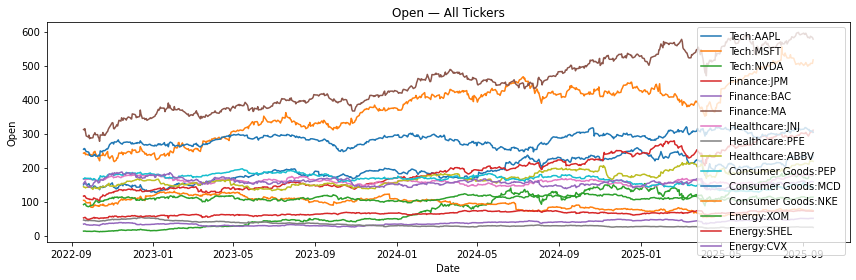

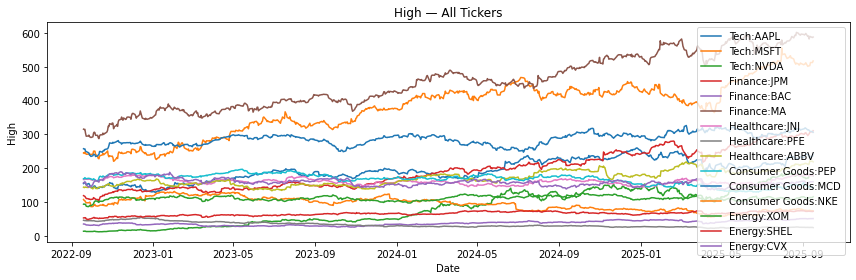

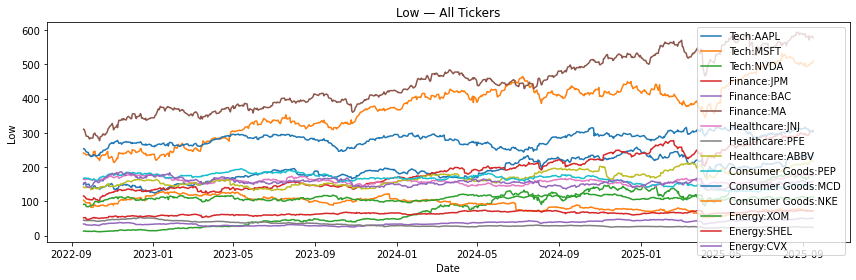

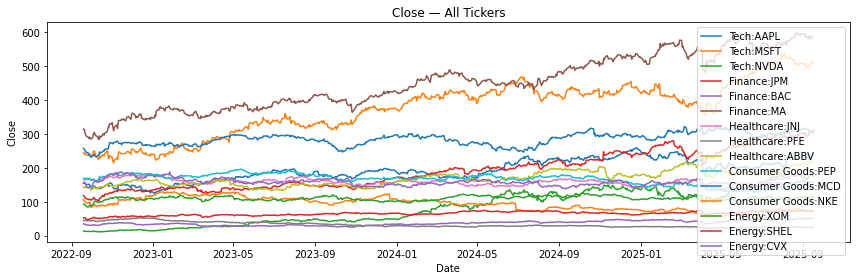

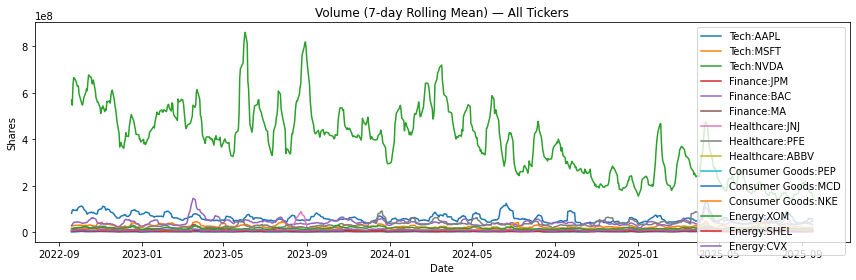

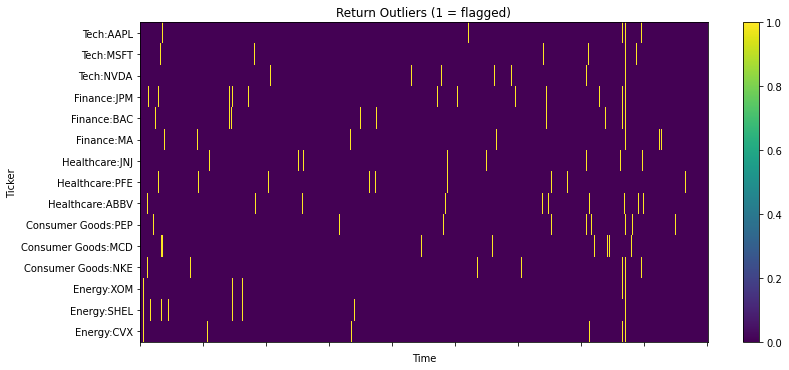

In [38]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Helper: flatten MultiIndex columns like ('Tech','AAPL') -> 'Tech:AAPL' for legible legends
def _flatten_cols(df):
    if isinstance(df.columns, pd.MultiIndex):
        df = df.copy()
        df.columns = [f"{lvl0}:{lvl1}" for lvl0, lvl1 in df.columns.to_list()]
    return df

# OPEN
plt.figure(figsize=(12, 4))
_flat = _flatten_cols(open_df)
_flat.plot(ax=plt.gca(), legend=True)
plt.title("Open — All Tickers")
plt.xlabel("Date"); plt.ylabel("Open")
plt.tight_layout(); plt.show()

# HIGH
plt.figure(figsize=(12, 4))
_flat = _flatten_cols(high_df)
_flat.plot(ax=plt.gca(), legend=True)
plt.title("High — All Tickers")
plt.xlabel("Date"); plt.ylabel("High")
plt.tight_layout(); plt.show()

# LOW
plt.figure(figsize=(12, 4))
_flat = _flatten_cols(low_df)
_flat.plot(ax=plt.gca(), legend=True)
plt.title("Low — All Tickers")
plt.xlabel("Date"); plt.ylabel("Low")
plt.tight_layout(); plt.show()

# CLOSE
plt.figure(figsize=(12, 4))
_flat = _flatten_cols(close_df)
_flat.plot(ax=plt.gca(), legend=True)
plt.title("Close — All Tickers")
plt.xlabel("Date"); plt.ylabel("Close")
plt.tight_layout(); plt.show()

# VOLUME (smoothed)
plt.figure(figsize=(12, 4))
_flat = _flatten_cols(volume_df.rolling(7, min_periods=1).mean())
_flat.plot(ax=plt.gca(), legend=True)
plt.title("Volume (7-day Rolling Mean) — All Tickers")
plt.xlabel("Date"); plt.ylabel("Shares")
plt.tight_layout(); plt.show()

# OUTLIERS heatmap with numbers (0/1), respecting Sector/Ticker labels
# Convert booleans → ints
out_int = outlier_df.astype(int)

# Build y-axis labels. If MultiIndex cols, use "Sector:Ticker"
if isinstance(out_int.columns, pd.MultiIndex):
    y_labels = [f"{s}:{t}" for s, t in out_int.columns.to_list()]
else:
    y_labels = list(out_int.columns)

Z = out_int.values.T  # (tickers x dates) for plotting
fig, ax = plt.subplots(figsize=(12, max(4, len(y_labels)*0.35)))
im = ax.imshow(Z, aspect="auto", interpolation="nearest")

# Colorbar and labels
ax.set_title("Return Outliers (1 = flagged)")
ax.set_xlabel("Time")
ax.set_ylabel("Ticker")
ax.set_yticks(range(len(y_labels)))
ax.set_yticklabels(y_labels)

# Optional: show fewer x ticks to avoid clutter
ax.set_xticks(np.linspace(0, Z.shape[1]-1, num=min(10, Z.shape[1]), dtype=int))
ax.set_xticklabels([""]*len(ax.get_xticks()))  # hide dates if too dense (keeps clean)

fig.colorbar(im)

# Annotate each cell with 0/1 (limit if very large to keep it fast)
max_cells_to_annotate = 2000  # tweak if needed
H, W = Z.shape
if H * W <= max_cells_to_annotate:
    for i in range(H):        # rows (tickers)
        for j in range(W):    # cols (time)
            ax.text(j, i, str(Z[i, j]), ha="center", va="center", fontsize=8, color="black")

plt.tight_layout(); plt.show()


## Feature Algoritms


SMA Function

In [6]:
def calculate_sma(df, window=5):
    df_list = []
    for ticker, group in df.groupby('Ticker'):
        group = group.sort_values('Date')
        group['SMA_' + str(window)] = group['Close'].rolling(window).mean()
        df_list.append(group)
    return pd.concat(df_list, ignore_index=True)

df = calculate_sma(df, window=5)
df.head()

Price,Date,Open,High,Low,Close,Volume,Ticker,Sector,SMA_5
0,2023-01-03,128.468194,129.079567,122.443165,123.330650,112117500,AAPL,Technology,NaN
1,2023-01-04,125.125343,126.870731,123.340517,124.602715,89113600,AAPL,Technology,NaN
2,2023-01-05,125.361991,125.993089,123.024955,123.281334,80962700,AAPL,Technology,NaN
3,2023-01-06,124.257586,128.478056,123.153159,127.817375,87754700,AAPL,Technology,NaN
4,2023-01-09,128.655553,131.554669,128.083618,128.339996,70790800,AAPL,Technology,125.474414


In [7]:
df = calculate_sma(df, window=20)
df.head()

Price,Date,Open,High,Low,Close,Volume,Ticker,Sector,SMA_5,SMA_20
0,2023-01-03,128.468194,129.079567,122.443165,123.330650,112117500,AAPL,Technology,NaN,NaN
1,2023-01-04,125.125343,126.870731,123.340517,124.602715,89113600,AAPL,Technology,NaN,NaN
2,2023-01-05,125.361991,125.993089,123.024955,123.281334,80962700,AAPL,Technology,NaN,NaN
3,2023-01-06,124.257586,128.478056,123.153159,127.817375,87754700,AAPL,Technology,NaN,NaN
4,2023-01-09,128.655553,131.554669,128.083618,128.339996,70790800,AAPL,Technology,125.474414,NaN


Daily Returns

In [8]:
def calculate_daily_returns(df):
    df_list = []
    for ticker, group in df.groupby('Ticker'):
        group = group.sort_values('Date')
        group['Daily_Return'] = group['Close'].pct_change()
        df_list.append(group)
    return pd.concat(df_list, ignore_index=True)

df = calculate_daily_returns(df)
df.head()


Price,Date,Open,High,Low,Close,Volume,Ticker,Sector,SMA_5,SMA_20,Daily_Return
0,2023-01-03,128.468194,129.079567,122.443165,123.330650,112117500,AAPL,Technology,NaN,NaN,NaN
1,2023-01-04,125.125343,126.870731,123.340517,124.602715,89113600,AAPL,Technology,NaN,NaN,0.010314
2,2023-01-05,125.361991,125.993089,123.024955,123.281334,80962700,AAPL,Technology,NaN,NaN,-0.010605
3,2023-01-06,124.257586,128.478056,123.153159,127.817375,87754700,AAPL,Technology,NaN,NaN,0.036794
4,2023-01-09,128.655553,131.554669,128.083618,128.339996,70790800,AAPL,Technology,125.474414,NaN,0.004089


In [9]:
def detect_trends(df):
    df_list = []
    for ticker, group in df.groupby('Ticker'):
        group = group.sort_values('Date')
        run = [0]*len(group)
        close = group['Close'].values
        for i in range(1, len(close)):
            if close[i] > close[i-1]:
                run[i] = run[i-1]+1 if run[i-1]>=0 else 1
            elif close[i] < close[i-1]:
                run[i] = run[i-1]-1 if run[i-1]<=0 else -1
            else:
                run[i] = 0
        group['Trend_Run'] = run
        df_list.append(group)
    return pd.concat(df_list, ignore_index=True)

df = detect_trends(df)
df.head()


Price,Date,Open,High,Low,Close,Volume,Ticker,Sector,SMA_5,SMA_20,Daily_Return,Trend_Run
0,2023-01-03,128.468194,129.079567,122.443165,123.330650,112117500,AAPL,Technology,NaN,NaN,NaN,0
1,2023-01-04,125.125343,126.870731,123.340517,124.602715,89113600,AAPL,Technology,NaN,NaN,0.010314,1
2,2023-01-05,125.361991,125.993089,123.024955,123.281334,80962700,AAPL,Technology,NaN,NaN,-0.010605,-1
3,2023-01-06,124.257586,128.478056,123.153159,127.817375,87754700,AAPL,Technology,NaN,NaN,0.036794,1
4,2023-01-09,128.655553,131.554669,128.083618,128.339996,70790800,AAPL,Technology,125.474414,NaN,0.004089,2


<span style="color:red; font-weight:bold"> Max Calculations (yet to do)</span>

<span style="color:red; font-weight:bold">Visualization Checking (to merge ontop after seach function and showcase each ticker)</span>

In [10]:
# Pick a single ticker for visualization
ticker_to_plot = 'AAPL'
plot_df = df[df['Ticker'] == ticker_to_plot]

fig = go.Figure()
fig.add_trace(go.Scatter(x=plot_df['Date'], y=plot_df['Close'],
                         mode='lines', name='Close Price'))
fig.add_trace(go.Scatter(x=plot_df['Date'], y=plot_df['SMA_5'],
                         mode='lines', name='SMA 5'))
fig.add_trace(go.Scatter(x=plot_df['Date'], y=plot_df['SMA_20'],
                         mode='lines', name='SMA 20'))

fig.update_layout(title=f'{ticker_to_plot} Price with SMAs',
                  xaxis_title='Date',
                  yaxis_title='Price (USD)')
fig.show()


In [11]:
fig = px.line(df[df['Ticker'] == 'AAPL'], x='Date', y='Daily_Return',
              title='Daily Returns of AAPL')
fig.show()

In [12]:
fig = px.line(df[df['Ticker'] == 'AAPL'], x='Date', y='Trend_Run',
              title='Trend Runs of AAPL')
fig.show()